In [33]:
import numpy as np # linear algebra
from numpy import log

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization

import math

from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pylab import rcParams

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.stattools import adfuller #for Stationarity


import pmdarima as pm # Auto TimeSeries

from sklearn.metrics import mean_absolute_error, mean_squared_error #Error Metrics
import warnings # Supress warnings 
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("GlobalLandTemperaturesByState (1).csv")

In [6]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [7]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object

In [8]:
df.shape

(645675, 5)

In [9]:
df.isnull().sum()

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

In [10]:
df.head(100)

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
...,...,...,...,...,...
95,1863-04-01,NaN,NaN,Acre,Brazil
96,1863-05-01,NaN,NaN,Acre,Brazil
97,1863-06-01,NaN,NaN,Acre,Brazil
98,1863-07-01,NaN,NaN,Acre,Brazil


In [11]:
df = df.dropna(how='any',axis=0) 

In [12]:
df.shape

(620027, 5)

In [13]:
df.rename(columns={'dt':'Date', 'AverageTemperature':'Avg_temp', 'AverageTemperatureUncertainty':'confidence_interval_temp'}, inplace=True)
df.head()

,Date,Avg_temp,confidence_interval_temp,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.index

DatetimeIndex(['1855-05-01', '1855-06-01', '1855-07-01', '1855-08-01',
               '1855-09-01', '1855-10-01', '1855-11-01', '1855-12-01',
               '1856-01-01', '1856-02-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='Date', length=620027, freq=None)

In [15]:
df.dtypes

Avg_temp                    float64
confidence_interval_temp    float64
State                        object
Country                      object
dtype: object

In [16]:
df.describe()

,Avg_temp,confidence_interval_temp
count,620027.000000,620027.000000
mean,8.993111,1.287647
std,13.772150,1.360392
min,-45.389000,0.036000
25%,-0.693000,0.316000
50%,11.199000,0.656000
75%,19.899000,1.850000
max,36.339000,12.646000


In [17]:
df.index

DatetimeIndex(['1855-05-01', '1855-06-01', '1855-07-01', '1855-08-01',
               '1855-09-01', '1855-10-01', '1855-11-01', '1855-12-01',
               '1856-01-01', '1856-02-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='Date', length=620027, freq=None)

In [18]:
df['Year'] = df.index.year
df.head()

,Avg_temp,confidence_interval_temp,State,Country,Year
Date,,,,,
1855-05-01,25.544,1.171,Acre,Brazil,1855
1855-06-01,24.228,1.103,Acre,Brazil,1855
1855-07-01,24.371,1.044,Acre,Brazil,1855
1855-08-01,25.427,1.073,Acre,Brazil,1855
1855-09-01,25.675,1.014,Acre,Brazil,1855


In [19]:
df.describe()

,Avg_temp,confidence_interval_temp,Year
count,620027.000000,620027.000000,620027.000000
mean,8.993111,1.287647,1902.331598
std,13.772150,1.360392,67.831393
min,-45.389000,0.036000,1743.000000
25%,-0.693000,0.316000,1851.000000
50%,11.199000,0.656000,1906.000000
75%,19.899000,1.850000,1960.000000
max,36.339000,12.646000,2013.000000


In [20]:
latest_df = df.loc['1980':'2013']
latest_df.head()

,Avg_temp,confidence_interval_temp,State,Country,Year
Date,,,,,
1980-01-01,26.652,0.190,Acre,Brazil,1980
1980-02-01,26.495,0.495,Acre,Brazil,1980
1980-03-01,26.270,0.236,Acre,Brazil,1980
1980-04-01,26.430,0.201,Acre,Brazil,1980
1980-05-01,25.802,0.882,Acre,Brazil,1980


In [21]:
latest_df[['Country','Avg_temp']].groupby(['Country']).mean().sort_values('Avg_temp')

,Avg_temp
Country,
Canada,-0.681256
Russia,2.432833
United States,11.516373
China,12.150210
Australia,18.447621
India,22.871669
Brazil,24.537580


In [ ]:
plt.figure(figsize=(9, 4))
sns.lineplot(x = "Year", y = "Avg_temp", data=latest_df)
plt.show()

In [26]:
resample_df = latest_df[['Avg_temp']].resample('A').mean()

In [27]:
resample_df

,Avg_temp
Date,
1980-12-31,9.689856
1981-12-31,10.366578
1982-12-31,9.837958
1983-12-31,10.259516
1984-12-31,9.724950
1985-12-31,9.465436
1986-12-31,9.914519
1987-12-31,9.726528
1988-12-31,10.158058


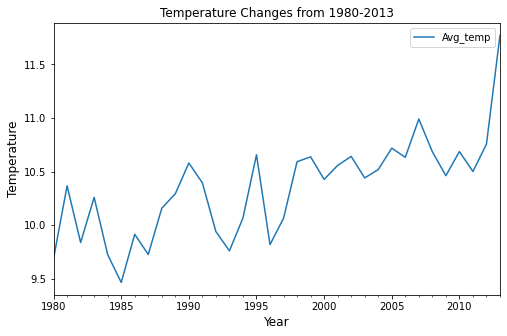

In [29]:
resample_df.plot(title='Temperature Changes from 1980-2013',figsize=(8,5))
plt.ylabel('Temperature',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.legend()

In [34]:
from statsmodels.tsa.stattools import adfuller

print ('Dickey-Fuller Test Results:')
test_df = adfuller(resample_df.iloc[:,0].values, autolag='AIC')
df_output = pd.Series(test_df[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in test_df[4].items():
    df_output['Critical Value (%s)'%key] = value
print (df_output)

Dickey-Fuller Test Results:
Test Statistic                 -0.728209
p-value                         0.839307
Lags Used                       2.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


In [35]:
decomp = seasonal_decompose(resample_df)  

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

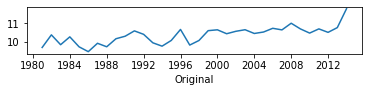

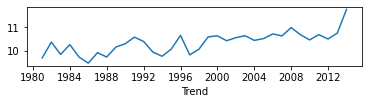

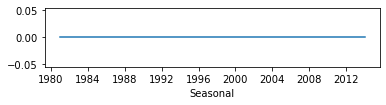

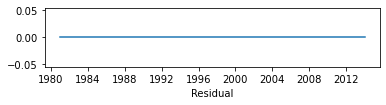

<Figure size 432x360 with 0 Axes>

In [36]:
# Plotting the original time series
plt.subplot(411)
plt.plot(resample_df)
plt.xlabel('Original')
plt.figure(figsize=(6,5))

# Plotting the trend component
plt.subplot(412)
plt.plot(trend)
plt.xlabel('Trend')
plt.figure(figsize=(6,5))

# Plotting the seasonal component
plt.subplot(413)
plt.plot(seasonal)
plt.xlabel('Seasonal')
plt.figure(figsize=(6,5))

# Plotting the residual component
plt.subplot(414)
plt.plot(residual)
plt.xlabel('Residual')
plt.figure(figsize=(6,5))

plt.tight_layout()

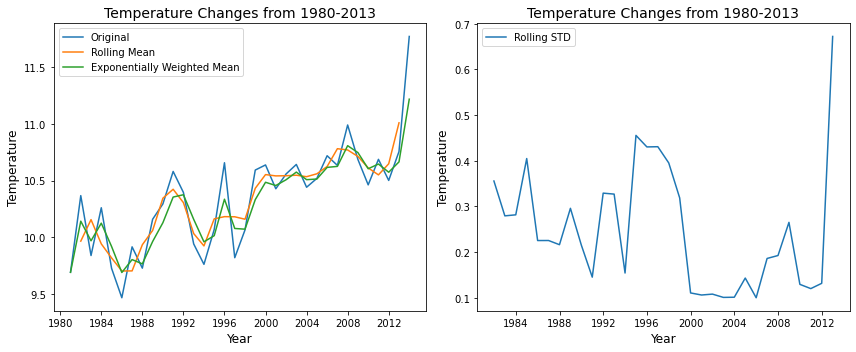

In [37]:
rol_mean = resample_df.rolling(window=3, center=True).mean()

# Exponentially weighted mean 
ewm = resample_df.ewm(span=3).mean()

# Rolling standard deviation 
rol_std = resample_df.rolling(window=3, center=True).std()

# Creating subplots next to each other
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# Temperature graph with rolling mean and exponentially weighted mean
ax1.plot(resample_df,label='Original')
ax1.plot(rol_mean,label='Rolling Mean')
ax1.plot(ewm, label='Exponentially Weighted Mean')
ax1.set_title('Temperature Changes from 1980-2013',fontsize=14)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()

# Temperature graph with rolling STD 
ax2.plot(rol_std,label='Rolling STD')
ax2.set_title('Temperature Changes from 1980-2013',fontsize=14)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()

In [38]:
rol_mean.dropna(inplace=True)
ewm.dropna(inplace=True)
print ('Dickey-Fuller Test for the Rolling Mean:')
df_test = adfuller(rol_mean.iloc[:,0].values, autolag='AIC')
df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in df_test[4].items():
    df_output['Critical Value (%s)'%key] = value
print (df_output)
print ('')
print ('Dickey-Fuller Test for the Exponentially Weighted Mean:')
df_test = adfuller(ewm.iloc[:,0].values, autolag='AIC')
df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in df_test[4].items():
    df_output['Critical Value (%s)'%key] = value
print (df_output)

Dickey-Fuller Test for the Rolling Mean:
Test Statistic                  0.275101
p-value                         0.976173
Lags Used                       8.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64

Dickey-Fuller Test for the Exponentially Weighted Mean:
Test Statistic                 -0.338693
p-value                         0.919843
Lags Used                       2.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


In [39]:
diff_rol_mean = resample_df - rol_mean
diff_rol_mean.dropna(inplace=True)
diff_rol_mean.head()

,Avg_temp
Date,
1981-12-31,0.401781
1982-12-31,-0.316726
1983-12-31,0.318708
1984-12-31,-0.091684
1985-12-31,-0.236199


In [40]:
diff_ewm = resample_df - ewm
diff_ewm.dropna(inplace=True)
diff_ewm.head()

,Avg_temp
Date,
1980-12-31,0.000000
1981-12-31,0.225574
1982-12-31,-0.129877
1983-12-31,0.136118
1984-12-31,-0.192797


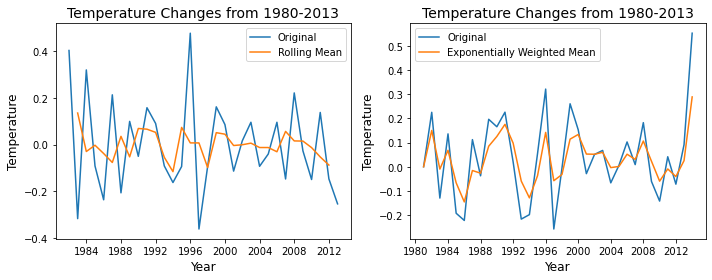

In [41]:
df_rol_mean_diff = diff_rol_mean.rolling(window=3, center=True).mean()

# Expotentially weighted mean of the difference
df_ewm_diff = diff_ewm.ewm(span=3).mean()

# Creating subplots next to each other
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

# Difference graph with the rolling mean
ax1.plot(diff_rol_mean,label='Original')
ax1.plot(df_rol_mean_diff,label='Rolling Mean')
ax1.set_title('Temperature Changes from 1980-2013',fontsize=14)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()

# Difference graph with the exponentially weighted mean
ax2.plot(diff_ewm,label='Original')
ax2.plot(df_ewm_diff,label='Exponentially Weighted Mean')
ax2.set_title('Temperature Changes from 1980-2013',fontsize=14)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend()

plt.tight_layout()

In [42]:
print ('Dickey-Fuller Test for the Difference between the Original and Rolling Mean:')
dftest = adfuller(diff_rol_mean.iloc[:,0].values, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)
print ('')
print ('Dickey-Fuller Test for the Difference between the Original and Exponentially Weighted Mean:')
dftest = adfuller(diff_ewm.iloc[:,0].values, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Dickey-Fuller Test for the Difference between the Original and Rolling Mean:
Test Statistic                -7.007710e+00
p-value                        7.051586e-10
#Lags Used                     1.000000e+00
Number of Observations Used    3.000000e+01
Critical Value (1%)           -3.669920e+00
Critical Value (5%)           -2.964071e+00
Critical Value (10%)          -2.621171e+00
dtype: float64

Dickey-Fuller Test for the Difference between the Original and Exponentially Weighted Mean:
Test Statistic                 -4.297446
p-value                         0.000449
#Lags Used                      1.000000
Number of Observations Used    32.000000
Critical Value (1%)            -3.653520
Critical Value (5%)            -2.957219
Critical Value (10%)           -2.617588
dtype: float64


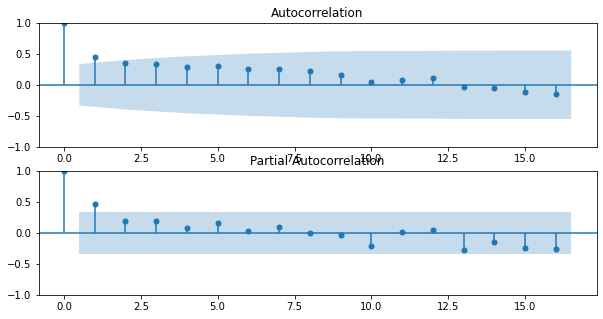

In [43]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

# Plotting the autocorrelation and partial autocorrelation graphs
pyplot.figure(figsize=(10,5))
pyplot.subplot(211)
plot_acf(resample_df, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(resample_df, ax=pyplot.gca())
pyplot.show()

In [44]:
!pip install pmdarima


In [48]:
from pmdarima import auto_arima

In [51]:
order = auto_arima(resample_df['Avg_temp'], trace=True)
order.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=35.591, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=35.025, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=34.441, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.200 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   34
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -16.221
Date:                Tue, 08 Nov 2022   AIC                             34.441
Time:                        22:45:25   BIC                             35.938
Sample:                    12-31-1980   HQIC                            34.945
                         - 12-31-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.1565      0.040      3.958      0.000       0.079       0.234
===================================================================================
Ljung-Box (L1) (Q):                   2.05   Jarque-Bera (JB):                 0.03
Prob(Q):                              0.15   Prob(JB):                         0.99
Heteroskedasticity (H):               0.85   Skew:                             0.03
Prob(H) (two-sided):                  0.79   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
from statsmodels.tsa.arima_model import ARIMA

In [54]:
train = resample_df.iloc[:434019]['Avg_temp']
test = resample_df.iloc[434020:]['Avg_temp']

model = ARIMA(train, order=(0,1,0))   # 3=AR, I=0, MA= 3
model_fit = model.fit()
model_fit.summary()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [56]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

model = SARIMAX(train, order=(0,1,0), seasonal_order=(1,0,1,12))
model = model.fit()

In [61]:
train = resample_df.iloc[:440000]['Avg_temp']
test = resample_df.iloc[440001:]['Avg_temp']

In [64]:
resample_df['predict'] = model.predict(start= len(train) ,
                                                       end=len(train)+len(test)- 1, 
                                                       dynamic=True)
resample_df[['Avg_temp','predict']].plot()

ValueError: Prediction must have `end` after `start`.

<AxesSubplot:xlabel='Date'>

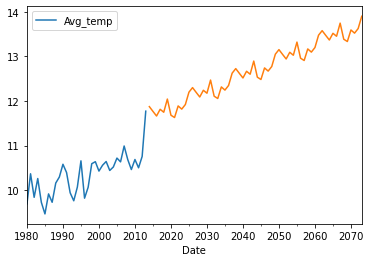

In [65]:
forecast = model.forecast(steps=60)
resample_df.plot()
forecast.plot()

In [66]:
forecast

2014-12-31    11.873367
2015-12-31    11.766802
2016-12-31    11.663069
2017-12-31    11.813430
2018-12-31    11.747346
2019-12-31    12.042861
2020-12-31    11.680469
2021-12-31    11.629039
2022-12-31    11.888798
2023-12-31    11.817734
2024-12-31    11.920560
2025-12-31    12.198015
2026-12-31    12.300179
2027-12-31    12.193706
2028-12-31    12.090061
2029-12-31    12.240294
2030-12-31    12.174266
2031-12-31    12.469528
2032-12-31    12.107447
2033-12-31    12.056060
2034-12-31    12.315597
2035-12-31    12.244595
2036-12-31    12.347333
2037-12-31    12.624550
2038-12-31    12.726627
2039-12-31    12.620245
2040-12-31    12.516689
2041-12-31    12.666793
2042-12-31    12.600821
2043-12-31    12.895831
2044-12-31    12.534059
2045-12-31    12.482717
2046-12-31    12.742032
2047-12-31    12.671090
2048-12-31    12.773740
2049-12-31    13.050720
2050-12-31    13.152709
2051-12-31    13.046418
2052-12-31    12.942951
2053-12-31    13.092927
2054-12-31    13.027012
2055-12-31    13